# Artificial Intelligence

## Lab 1: Regresi Linear dan Logistik

Dalam modul ini, Anda akan mengeksplorasi data foto dari Facebook dan mencoba memprediksi jumlah *likes* yang akan didapatkan suatu foto berdasarkan jumlah *shares* dan *comments*-nya. Selain itu, Anda juga akan melihat efek dari penggunaan fungsi basis polinomial untuk menghasilkan non-linearitas dari regresi linear. Pada poin tersebut, Anda akan mengevaluasi model yang disebut mengalami *underfitting* dan *overfitting*.

Pada bagian regresi logistik, Anda diberikan Iris dataset -- sebuah dataset standar yang biasa digunakan untuk melakukan tugas klasifikasi. Dataset yang diberikan diperkecil lagi untuk mempermudah melihat cara kerja regresi logistik untuk data dengan dua kelas. Anda akan melihat bagaimana cara untuk menemukan vektor bobot dan menggambarkan batas keputusan dari model regresi logistik.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

### Dataset

Data yang digunakan merupakan pos yang dihasilkan pada laman sebuah merk kosmetik. Data ini terdiri dari 500 baris, dengan beberapa macam atribut. Data ini tersedia di [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Facebook+metrics).

Referensi:
Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. *Journal of Business Research*, 69(9), 3341-3351.

In [2]:
# Memuat dataset
df = pd.read_csv('../datasets/dataset_Facebook.csv', delimiter=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
# Melihat atribut yang tersedia dalam dataset
df.columns

Index([u'Page total likes', u'Type', u'Category', u'Post Month',
       u'Post Weekday', u'Post Hour', u'Paid', u'Lifetime Post Total Reach',
       u'Lifetime Post Total Impressions', u'Lifetime Engaged Users',
       u'Lifetime Post Consumers', u'Lifetime Post Consumptions',
       u'Lifetime Post Impressions by people who have liked your Page',
       u'Lifetime Post reach by people who like your Page',
       u'Lifetime People who have liked your Page and engaged with your post',
       u'comment', u'like', u'share', u'Total Interactions'],
      dtype='object')

In [4]:
# Tipe pos yang dihasilkan dalam dataset
df['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [5]:
# Hanya memilih data berupa foto saja
photos = df[df['Type'] == 'Photo']

### Eksplorasi awal

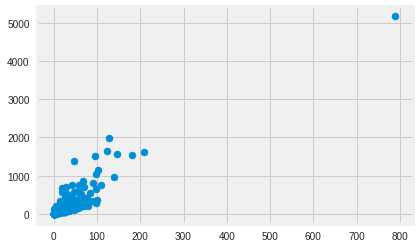

In [6]:
plt.scatter(photos.share, photos.like);

Dari gambar di atas, terlihat bahwa ada satu titik yang berada di pojok kanan atas. Data seperti ini bisa dianggap mengandung **pencilan** atau ***outliers***. Untuk kebutuhan analisis yang lebih baik, biasanya pencilan akan dibuang dari data yang digunakan.

### Membuang pencilan

In [7]:
photos = photos[photos.share < 300]

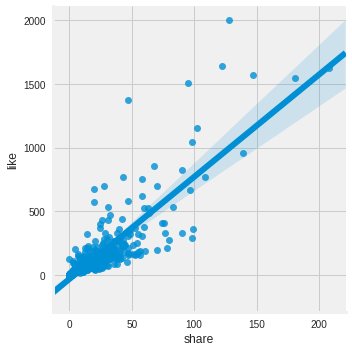

In [8]:
sns.lmplot(x='share', y='like', data=photos);

Garis yang dihasilkan di atas merupakan model hasil pencocokkan (*fitting*) regresi linear terhadap data yang dimiliki. Dapat dikatakan bahwa jumlah *share* berbanding lurus dengan jumlah *like*.

### Logaritmik

Dari gambar di atas, terlihat bahwa masih ada "masalah" karena terlalu banyak penumpukan di kiri bawah -- dekat titik (0,0). Untuk mencoba melihat sebaran datanya dengan lebih baik, kita dapat melakukan transformasi data dengan menggunakan fungsi yang juga konsisten naik, tetapi cenderung lebih landai, i.e. logaritma.

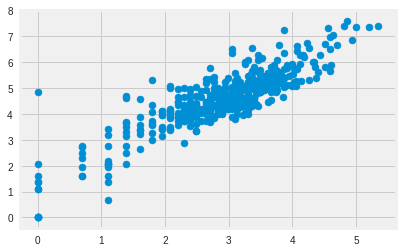

In [9]:
plt.scatter(np.log1p(photos.share), np.log1p(photos.like));

Fungsi `np.log1p` digunakan di sini karena ada beberapa foto yang jumlah *likes* atau *shares*-nya nol sehingga perlu sedikit modifikasi saat transformasi, yaitu dengan
$$
x^\prime = log(x + 1)
$$

### Plot 3-dimensi

Kali ini, kita mencoba untuk menambahkan prediktor baru, i.e. jumlah komentar, ke dalam model yang akan kita bangun. Oleh karena itu, model hasil regresi yang dilakukan sebaiknya digambarkan dalam 3D.

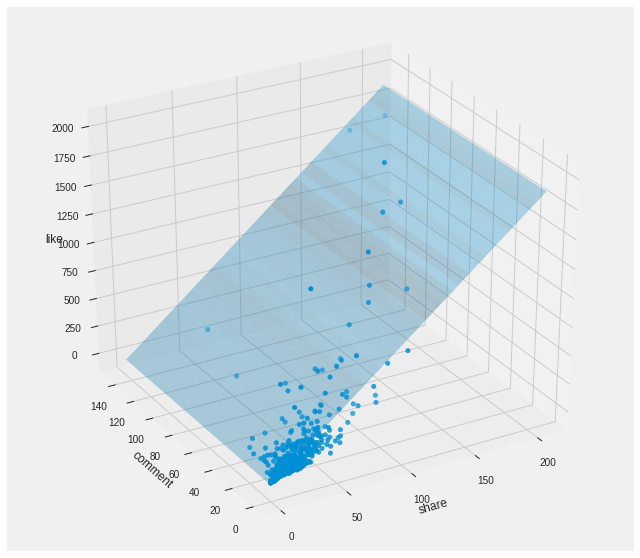

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(photos[['share','comment']], photos.like)

share = np.linspace(photos.share.min(), photos.share.max(), 500)
comment = np.linspace(photos.comment.min(), photos.comment.max(), 500)
values = np.concatenate([share[:, np.newaxis], comment[:, np.newaxis]], axis=1)
x1, x2 = np.meshgrid(share, comment)

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.gca(projection='3d')
ax.scatter(photos.share, photos.comment, photos.like)
ax.plot_surface(x1, x2, reg.intercept_ + values.dot(reg.coef_), alpha=0.3, linewidth=0)
ax.set_xlabel('share')
ax.set_ylabel('comment')
ax.set_zlabel('like')
ax.view_init(30, 240)
plt.show()

Nilai $w_1$ dan $w_2$ ($w_{\text{share}}$ dan $w_{\text{comment}}$) adalah

In [11]:
reg.coef_

array([ 6.65281589,  3.52511405])

Nilai $w_0$ atau bias yang dihasilkan adalah

In [12]:
reg.intercept_

-20.242327703635169

### Non-linearity

Perhatikan bahwa *hyperplanes* yang dihasilkan di atas hanya dapat berbentuk linear saja. Kali ini, kita akan melihat bagaimana regresi linear sederhana gagal dalam menghasilkan model yang baik untuk memprediksi data yang dihasilkan dengan fungsi sin dan bagaimana cara mengatasinya.

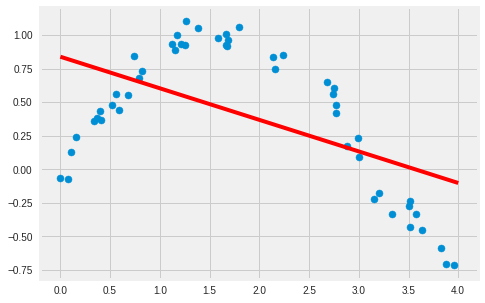

In [13]:
xfit = np.linspace(0, 4, 1000)

rng = np.random.RandomState(1)
x = 4 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

reg = LinearRegression()
reg.fit(x[:, np.newaxis], y)

yfit = reg.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x, y)
ax.plot(xfit, yfit, c='r');

Model di atas mengalami *underfitting* karena parameter yang digunakan tidak cukup untuk menghasilkan model yang optimal, i.e. *generalisation error* yang kecil. Oleh karena itu, kita melakukan transformasi data dengan menggunakan fungsi basis polinomial seperti di bawah ini.

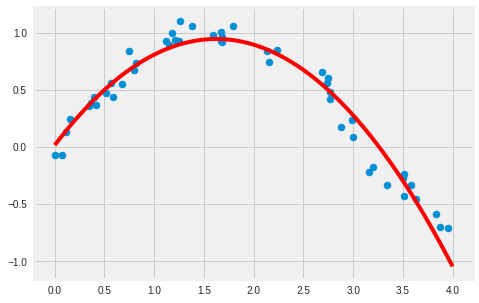

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x, y)
ax.plot(xfit, yfit, c='r');

Model yang dihasilkan ternyata sudah mampu lebih "meliuk-liuk", i.e. non-linear. Namun, apa yang terjadi ketika kita menggunakan pangkat yang lebih tinggi pada fungsi basis polinomial yang diterapkan?

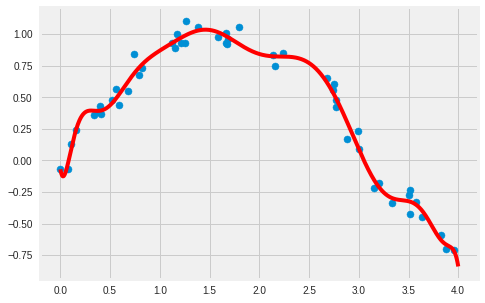

In [15]:
poly_model = make_pipeline(PolynomialFeatures(15),
                           LinearRegression())

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x, y)
ax.plot(xfit, yfit, c='r');

Perhatikan bahwa modelnya jadi lebih fleksibel lagi dengan parameter yang lebih banyak (baca kembali salindia untuk materi kuliah ini). Karena kita tahu bahwa data sebenarnya dihasilkan oleh fungsi sin dengan ditambahkan *noise*, maka sebetulnya garis yang lebih "meliuk-liuk" di sebelah kanan itu tidak diperlukan karena jika diberikan data baru yang ada di sekitar koordinat tersebut, kemungkinan untuk menghasilkan error-nya akan lebih besar. Ini yang dikenal sebagai kasus *overfitting*.

### Membagi data latih dan data uji

Kita akan mencoba lagi untuk data baru yang dibuat secara acak.

In [16]:
from sklearn.model_selection import train_test_split

n = 100
x = 10 * rng.rand(n)
y = np.sin(x) + 0.3 * rng.randn(n)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

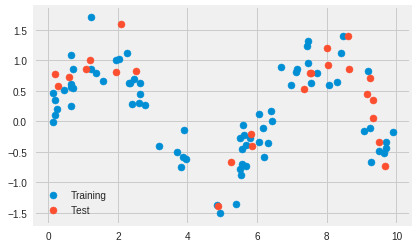

In [17]:
plt.scatter(x_train, y_train, label='Training')
plt.scatter(x_test, y_test, label='Test')
plt.legend();

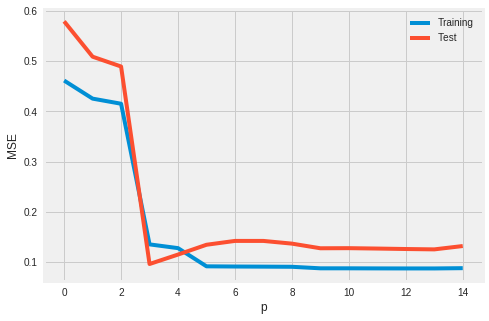

In [18]:
from sklearn.metrics import mean_squared_error

errors = []

for i in range(1,16):
    poly_model = make_pipeline(PolynomialFeatures(i),
                               LinearRegression())

    poly_model.fit(x_train[:, np.newaxis], y_train)
    y_train_pred = poly_model.predict(x_train[:, np.newaxis])
    y_pred = poly_model.predict(x_test[:, np.newaxis])
    errors.append((mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)))

errors = np.array(errors)
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(errors[:,0], label='Training')
ax.plot(errors[:,1], label='Test')
ax.legend()
ax.set_xlabel('p')
ax.set_ylabel('MSE');

## Regresi Logistik

### Fungsi sigmoid/logistik

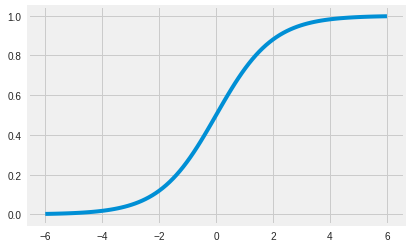

In [19]:
x = np.linspace(-6,6,100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y);

In [20]:
df = sns.load_dataset('iris')
df = df[df.species.isin(['setosa', 'versicolor'])]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


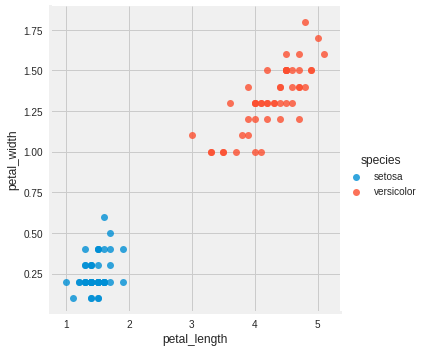

In [21]:
sns.lmplot(x='petal_length', y='petal_width', data=df, hue='species', fit_reg=False);

In [22]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(df[['petal_length','petal_width']], df.species)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

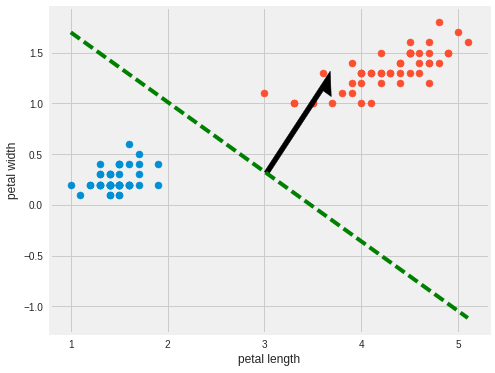

In [23]:
xmin, xmax = df.petal_length.min(), df.petal_length.max()
ymin, ymax = df.petal_width.min(), df.petal_width.max()

w = reg.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (reg.intercept_[0]) / w[1]

origin = np.array([3, a * 3 - (reg.intercept_[0]) / w[1]])
norm = np.linalg.norm(reg.coef_[0])

fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df[df.species == 'setosa'].petal_length, df[df.species == 'setosa'].petal_width)
ax.scatter(df[df.species == 'versicolor'].petal_length, df[df.species == 'versicolor'].petal_width)
ax.arrow(origin[0], origin[1], reg.coef_[0][0]/norm, reg.coef_[0][1]/norm, width=0.1, head_width=0.3, head_length=0.2, shape='left', fc='k', ec='k')
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.plot(xx, yy, ls="--", c='g');